## 개요

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [2]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 폰트 불러오기
plt.rc('font', family='NanumBarunGothic')

In [80]:
# 파일 불러오기
df = pd.read_csv('/content/ai4i2020.csv')

In [81]:
# 데이터 확인
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


### 전처리

In [82]:
# UDI를 인덱스로
df.set_index('UDI',inplace=True)
# 확인
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [83]:
# 컬럼명 단위 삭제
df.rename(columns={'Air temperature [K]':'Air temperature',
                   'Process temperature [K]':'Process temperature',
                   'Rotational speed [rpm]':'Rotational speed',
                   'Torque [Nm]':'Torque',
                   'Tool wear [min]':'Tool wear'},inplace=True)
# 확인
df

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [84]:
# 데이터 정보 확인 / null값 존재 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           10000 non-null  object 
 1   Type                 10000 non-null  object 
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Machine failure      10000 non-null  int64  
 8   TWF                  10000 non-null  int64  
 9   HDF                  10000 non-null  int64  
 10  PWF                  10000 non-null  int64  
 11  OSF                  10000 non-null  int64  
 12  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [85]:
# 대이터 개관 확인
df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [86]:
# 켈빈(K) 온도에서 섭씨(C) 온도로
df['Air temperature'] = df['Air temperature'] - 273.15
df['Process temperature'] = df['Process temperature'] - 273.15
# 확인
df

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0


In [87]:
# 한글화
df.rename(columns={'UDI':'고유 식별자',
                   'Product ID':'제품 ID',
                   'Type':'제품 유형',
                   'Air temperature':'기온',
                   'Process temperature':'공정 온도',
                   'Rotational speed':'회전 속도',
                   'Torque':'회전력',
                   'Tool wear':'공구 마모 시간',
                   'Machine failure':'고장 여부',
                   'TWF':'고장 원인 : 공구 마모',
                   'HDF':'고장 원인 : 열 방산',
                   'PWF':'고장 원인 : 동력 이상',
                   'OSF':'고장 원인 : 과부하',
                   'RNF':'고장 원인 : 알 수 없음'},inplace=True)
# 확인
df

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 알 수 없음
UDI,,,,,,,,,,,,,
1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0


# 기초 통계 분석

## 서론

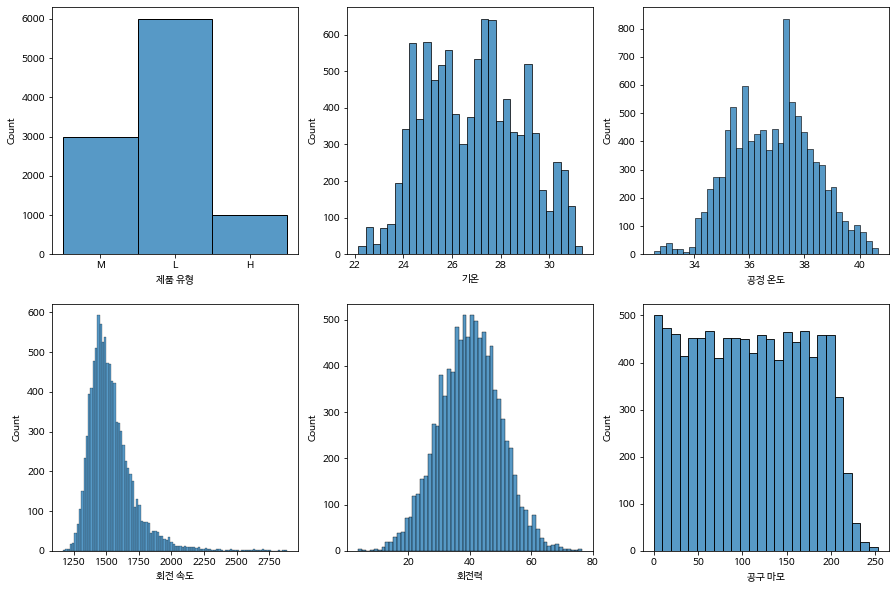

In [12]:
# 변인 분포 시각화
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

sns.histplot(df['제품 유형'],ax=ax1)
sns.histplot(df['기온'],ax=ax2)
sns.histplot(df['공정 온도'],ax=ax3)
sns.histplot(df['회전 속도'],ax=ax4)
sns.histplot(df['회전력'],ax=ax5)
sns.histplot(df['공구 마모 시간'],ax=ax6)

plt.show()

In [13]:
df.sum()

제품 ID             M14860L47181L47182L47183L47184M14865L47186L471...
제품 유형             MLLLLMLLMMHHMMLLMMHMHLMLMLLHLLMLLLMMMLHLLLMHML...
기온                                                         268549.3
공정 온도                                                      368555.6
회전 속도                                                      15387761
회전력                                                        399869.1
공구 마모                                                       1079510
고장 여부                                                           339
고장 원인 : 공구 마모                                                    46
고장 원인 : 열 방산                                                    115
고장 원인 : 동력 이상                                                    95
고장 원인 : 과부하                                                      98
고장 원인 : 알 수 없음                                                   19
dtype: object

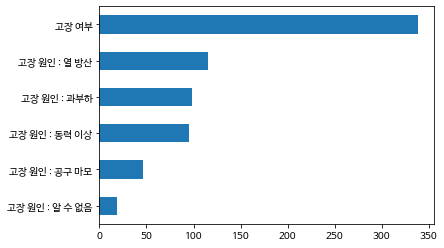

In [14]:
# 고장 원인 갯수 합산
df[['고장 여부', '고장 원인 : 공구 마모', '고장 원인 : 열 방산', '고장 원인 : 동력 이상', '고장 원인 : 과부하', '고장 원인 : 알 수 없음']].sum().sort_values().plot(kind='barh')

## 본론

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


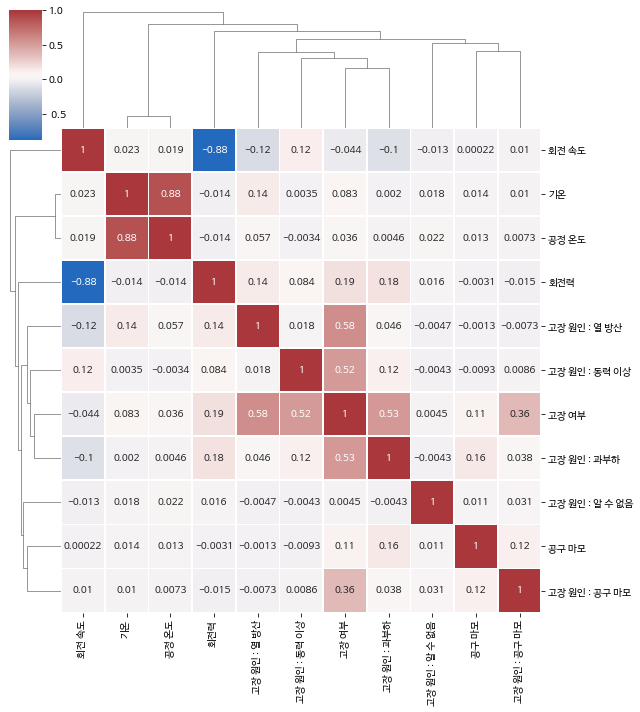

In [15]:
# 상관계수 도출
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

### 각 변수들과 실패 여부와의 상관관계 분석

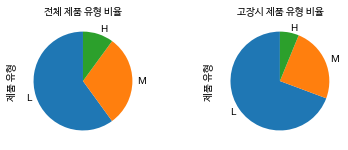

In [16]:
# 실패 여부에 따른 제품 유형 비율 파이 차트
fig = plt.figure(figsize=(10,5))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)

df['제품 유형'].value_counts().plot(kind='pie', startangle=90, ax=ax1)
df[df['고장 여부']==1]['제품 유형'].value_counts().plot(kind='pie', startangle=90, ax=ax2)

ax1.set_title('전체 제품 유형 비율', size=10)
ax2.set_title('고장시 제품 유형 비율', size=10)

plt.show()

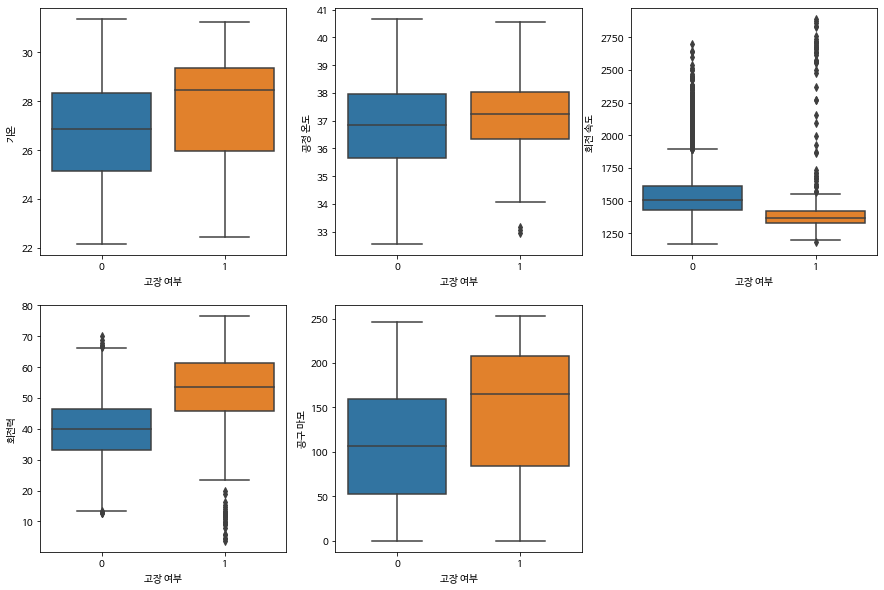

In [17]:
# 고장 여부와 여러 변수들 박스플롯
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 여부', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 여부', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 여부', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 여부', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 여부', y='공구 마모 시간', data=df, ax=ax5)

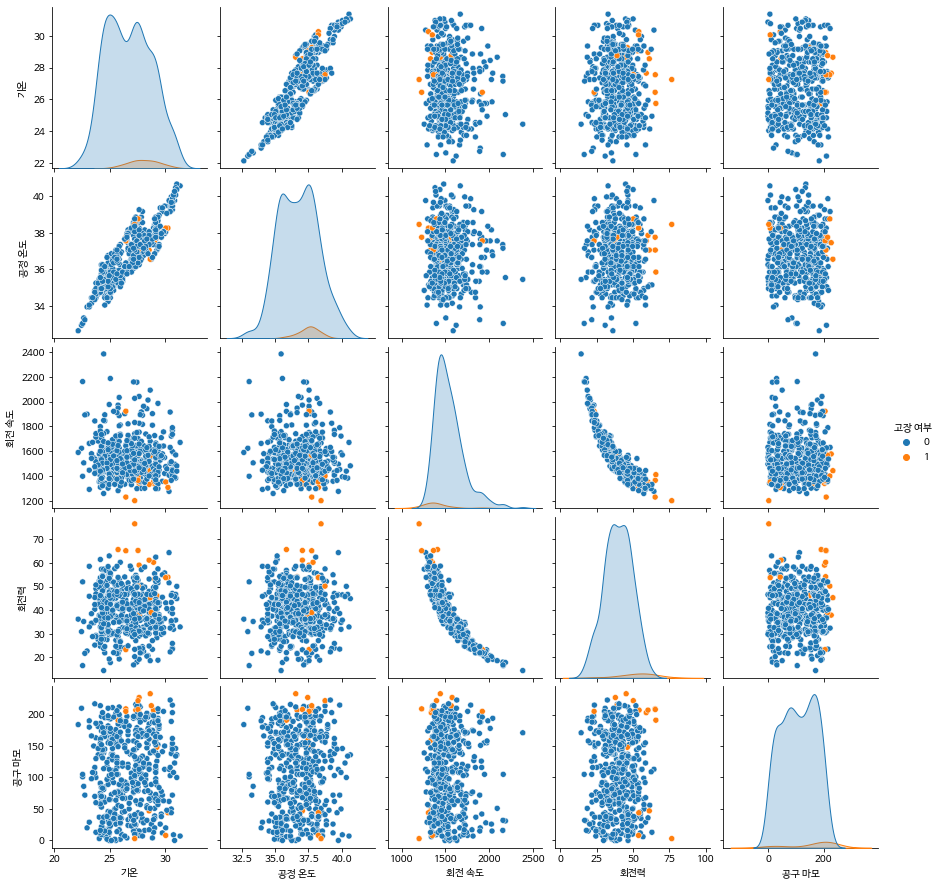

In [18]:
sns.pairplot(df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간', '고장 여부']].sample(frac=0.05), hue='고장 여부')

### 변수들과 각 실패요인 간의 상관관계 분석

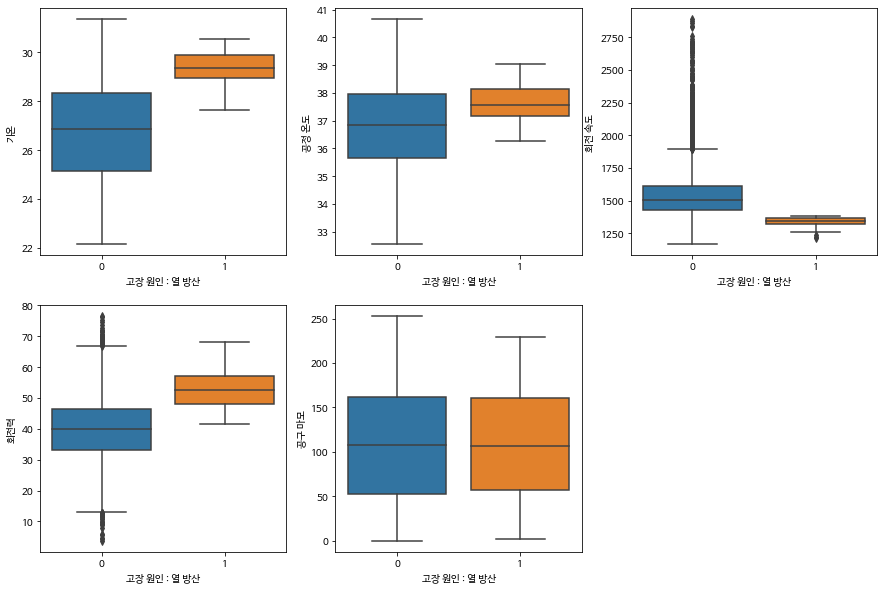

In [19]:
# 각 변수들과 '고장 원인 : 열 방산'과의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 열 방산', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 열 방산', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 열 방산', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 열 방산', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 열 방산', y='공구 마모 시간', data=df, ax=ax5)

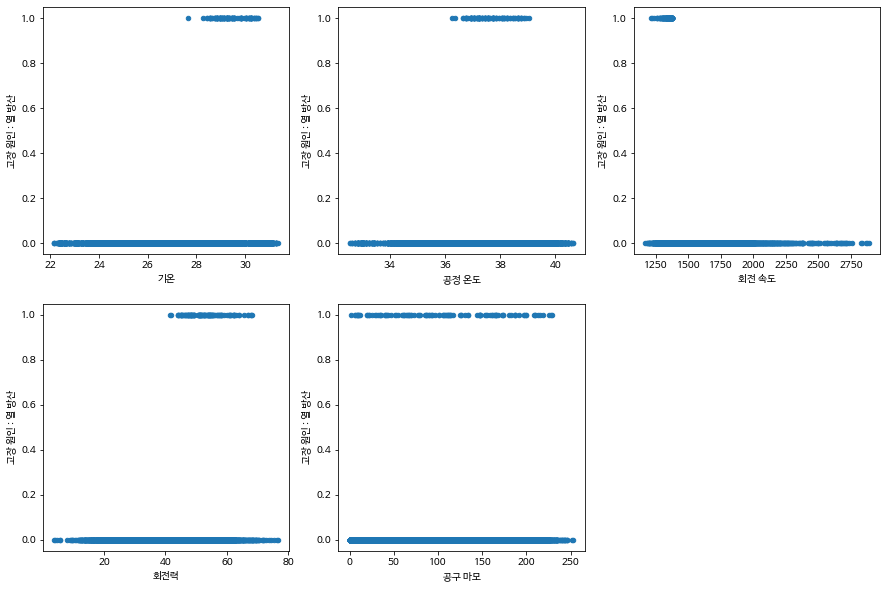

In [20]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 열 방산', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='고장 원인 : 열 방산', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='고장 원인 : 열 방산', kind='scatter', ax=ax3)
df.plot(x='회전력', y='고장 원인 : 열 방산', kind='scatter', ax=ax4)
df.plot(x='공구 마모 시간', y='고장 원인 : 열 방산', kind='scatter', ax=ax5)

In [73]:
print(df[df['고장 원인 : 열 방산'] == 1]['기온'].min())
print(df[df['고장 원인 : 열 방산'] == 1]['공정 온도'].min())
print(df[df['고장 원인 : 열 방산'] == 1]['회전 속도'].max())
print(df[df['고장 원인 : 열 방산'] == 1]['회전력'].min())

27.650000000000034
36.25
1379
41.6


In [ ]:
# 해석
# 고장 원인 : 열 방산의 경우
# 기온이 27.65도 이상, 공정온도 36.25도 이상, 회전속도 1379 rpm 이하, 회전력 41.6Nm 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

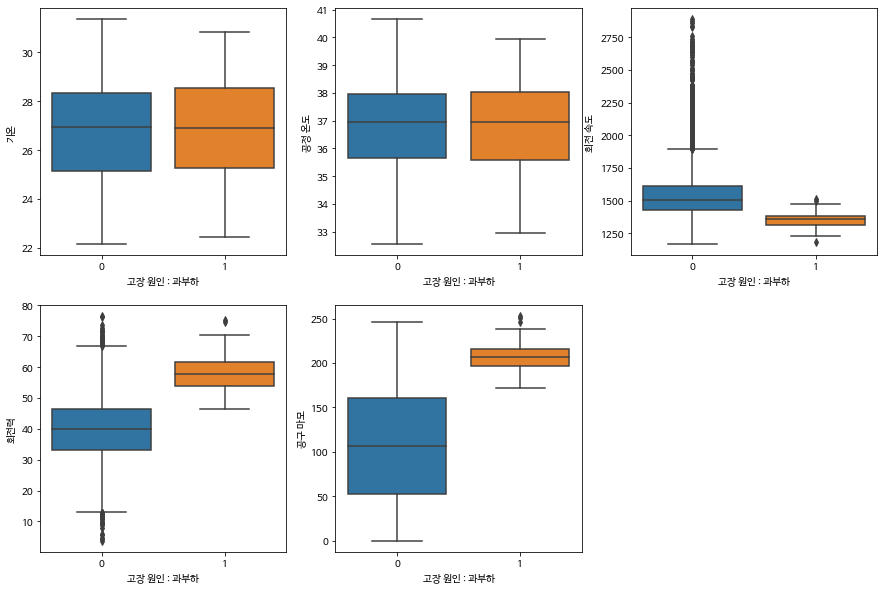

In [21]:
# 각 변수들과 '고장 원인 : 과부하'와의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 과부하', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 과부하', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 과부하', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 과부하', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 과부하', y='공구 마모 시간', data=df, ax=ax5)

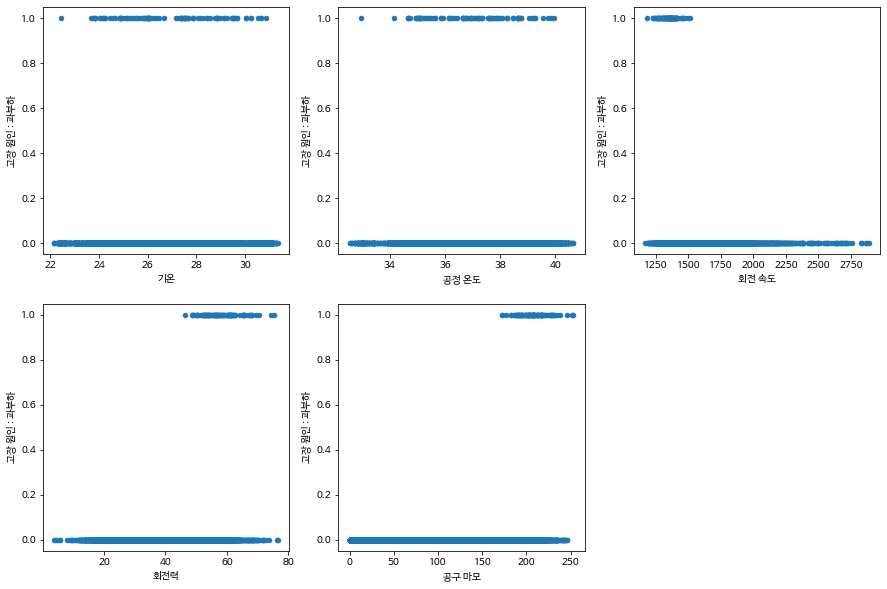

In [22]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 과부하', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='고장 원인 : 과부하', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='고장 원인 : 과부하', kind='scatter', ax=ax3)
df.plot(x='회전력', y='고장 원인 : 과부하', kind='scatter', ax=ax4)
df.plot(x='공구 마모 시간', y='고장 원인 : 과부하', kind='scatter', ax=ax5)

In [74]:
print(df[df['고장 원인 : 과부하'] == 1]['회전 속도'].max())
print(df[df['고장 원인 : 과부하'] == 1]['회전력'].min())
print(df[df['고장 원인 : 과부하'] == 1]['공구 마모 시간'].min())

1501
46.3
172.0


In [ ]:
# 해석
# 고장 원인 : 과부하의 경우
# 회전속도 1501 rpm 이하, 회전력 46.3Nm 이상, 공구 마모 시간 172min 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

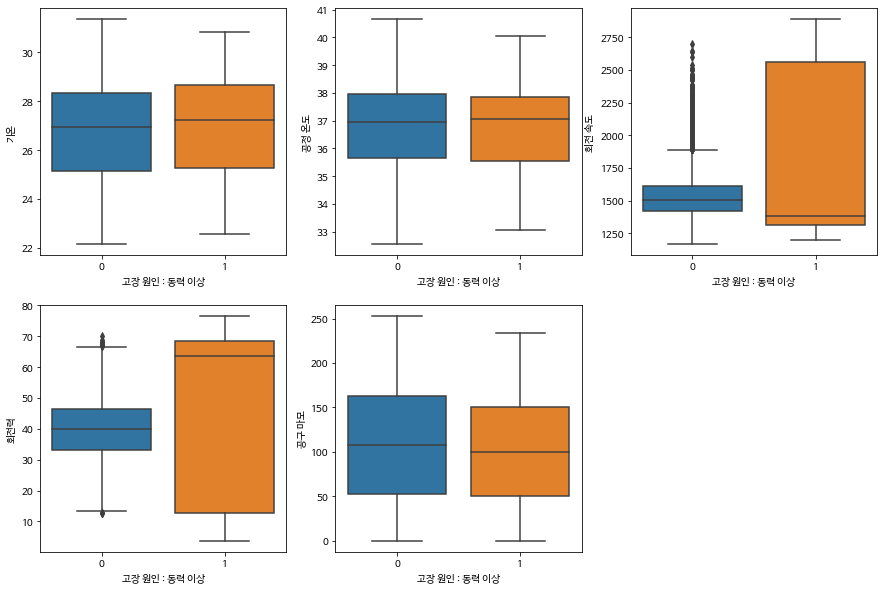

In [23]:
# 각 변수들과 '고장 원인 : 동력 이상'과의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 동력 이상', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 동력 이상', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 동력 이상', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 동력 이상', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 동력 이상', y='공구 마모 시간', data=df, ax=ax5)

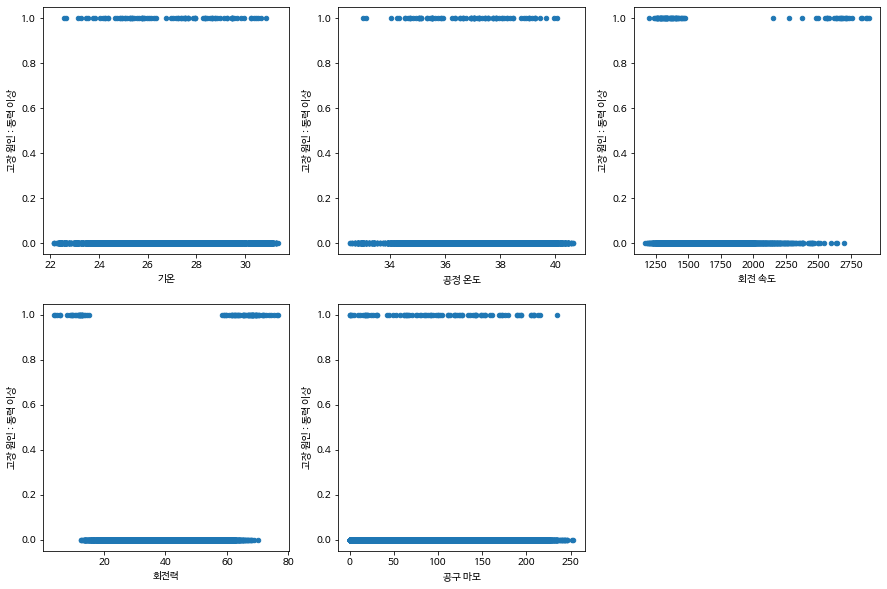

In [24]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 동력 이상', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='고장 원인 : 동력 이상', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='고장 원인 : 동력 이상', kind='scatter', ax=ax3)
df.plot(x='회전력', y='고장 원인 : 동력 이상', kind='scatter', ax=ax4)
df.plot(x='공구 마모 시간', y='고장 원인 : 동력 이상', kind='scatter', ax=ax5)

In [75]:
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전 속도'] < 1750)]['회전 속도'].max())
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전 속도'] > 1750)]['회전 속도'].min())
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전력'] < 40)]['회전력'].max())
print(df[(df['고장 원인 : 동력 이상'] == 1)&(df['회전력'] > 40)]['회전력'].min())

1479
2153
15.3
58.5


In [ ]:
# 해석
# 고장 원인 : 과부하의 경우
# 회전속도 1479 rpm 이하 또는 2153 rpm 이상, 회전력 15.3Nm 이하 또는 58.5Nm 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

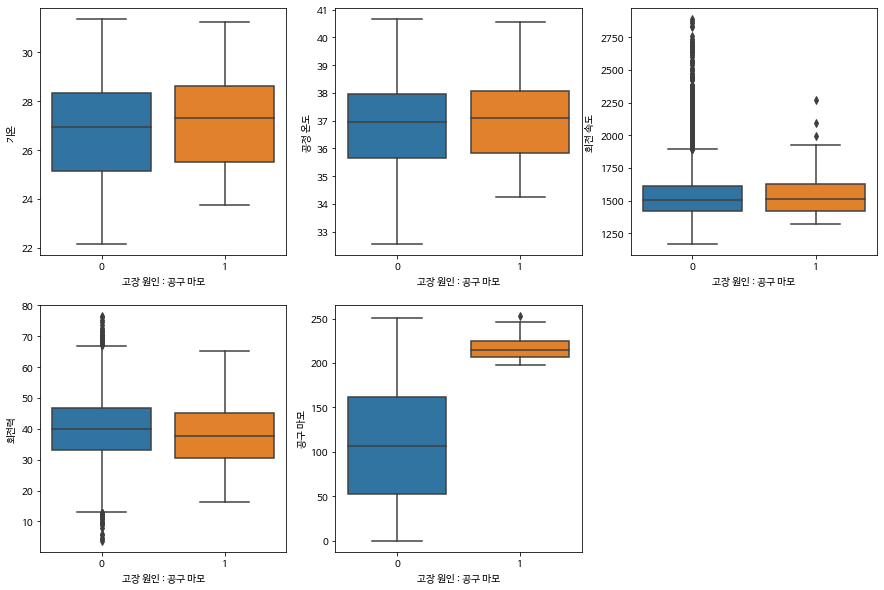

In [25]:
# 각 변수들과 '고장 원인 : 공구 마모'와의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 공구 마모', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 공구 마모', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 공구 마모', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 공구 마모', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 공구 마모', y='공구 마모 시간', data=df, ax=ax5)

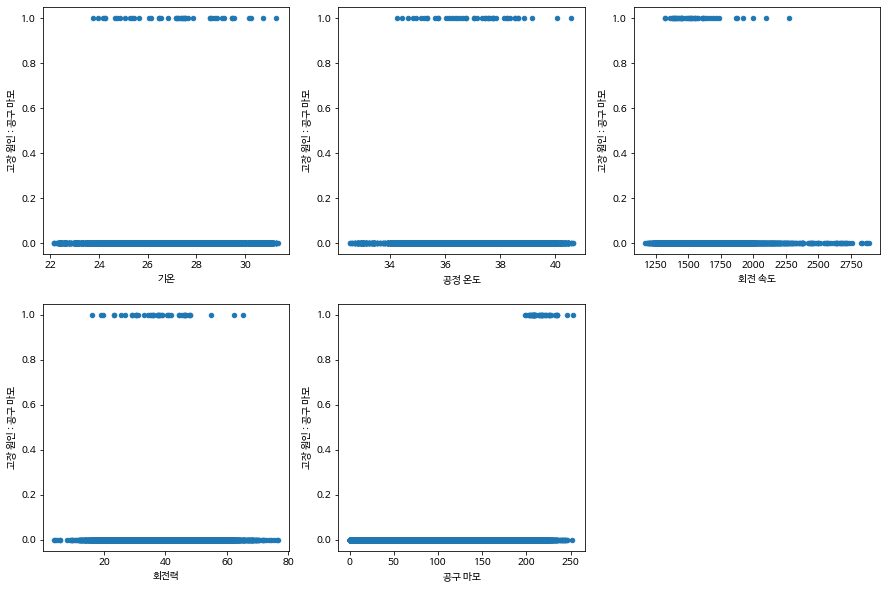

In [26]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 공구 마모', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='고장 원인 : 공구 마모', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='고장 원인 : 공구 마모', kind='scatter', ax=ax3)
df.plot(x='회전력', y='고장 원인 : 공구 마모', kind='scatter', ax=ax4)
df.plot(x='공구 마모 시간', y='고장 원인 : 공구 마모', kind='scatter', ax=ax5)

In [90]:
df[df['고장 원인 : 공구 마모'] == 1]['공구 마모 시간'].min()

198

In [ ]:
# 해석
# 고장 원인 : 공구 마모의 경우
# 공구 마모 시간 198min 이상의 조건에서 기계 고장이 일어나는 것으로 보인다.

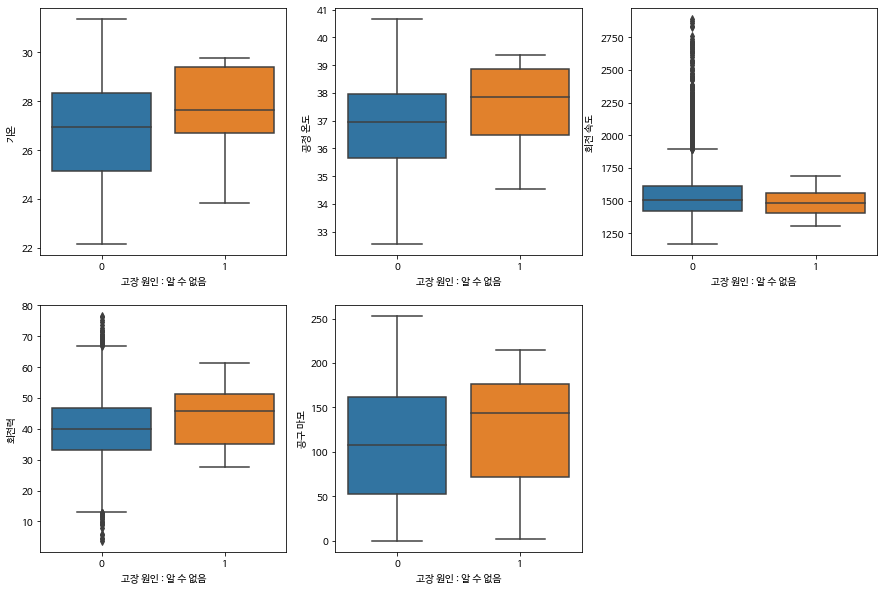

In [27]:
)# 각 변수들과 '고장 원인 : 알 수 없음'와의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 알 수 없음', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 알 수 없음', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 알 수 없음', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 알 수 없음', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 알 수 없음', y='공구 마모 시간', data=df, ax=ax5)

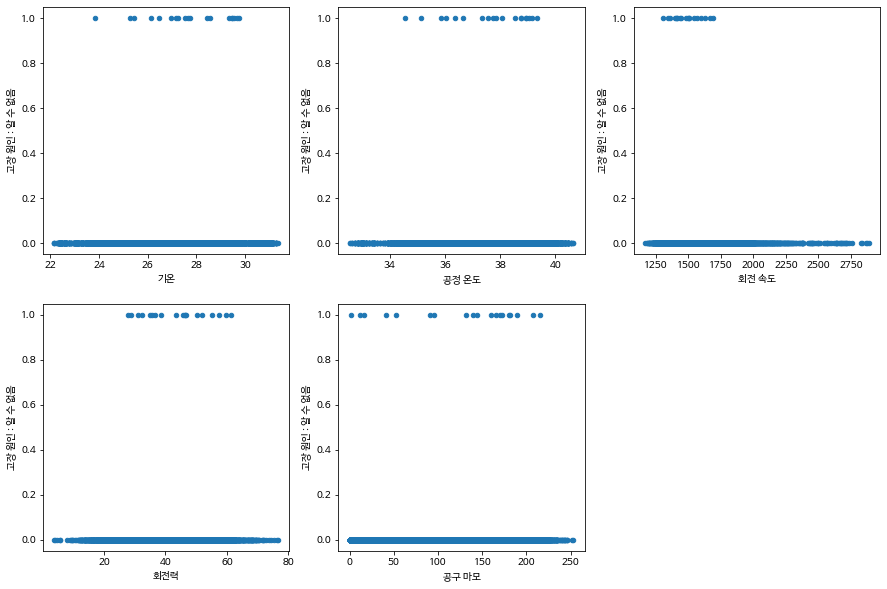

In [28]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 알 수 없음', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='고장 원인 : 알 수 없음', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='고장 원인 : 알 수 없음', kind='scatter', ax=ax3)
df.plot(x='회전력', y='고장 원인 : 알 수 없음', kind='scatter', ax=ax4)
df.plot(x='공구 마모 시간', y='고장 원인 : 알 수 없음', kind='scatter', ax=ax5)

## 결론

In [29]:
# 해석

# 1. 제품 유형 별로 볼 때, H와 M은 상대적으로 실패 비율이 낮고, L은 실패 비율이 높다.

# 2. 각 변수들은 전체 실패 여부보다는 각 실패 요인과 연관성을 나타낸다.
# 2-1. 열 방산에 의한 실패의 경우, 공구 마모를 제외한 다른 변수들과 모두 연관성이 나타난다.
# 2-2. 제품 변형에 의한 실패의 경우, 회전 속도, Torque, 공구 마모와 연관성이 나타난다.
# 2-3. 전력 이상에 의한 실패의 경우, 회전 속도, Torque와의 연관성이 나타난다.
# 2-4. 공구 마모에 의한 실패의 경우, 회전 속도, 공구 마모와의 연관성이 나타난다.
# 2-5. 실패 요인을 알 수 없는 경우, 회전 속도와의 경미한 연관성이 나타난다.

# 3. 종합해 봤을 때, 실패를 예방하기 위해서는
# 3-1. 기온은 27.65도, 공정 온도는 36.25도를 넘기지 않는 환경에서,
# 3-2. 회전속도는 1501~2153rpm 수준으로,
# 3-3, Torque는 15.3~46.3Nm 수준으로 유지하고,
# 3-4. 공구 마모 시간은 198min을 넘기지 않도록 하는 것이 방안이 될 수 있겠다.

#추가 분석

## 공구 마모 교체 시기 제외

In [30]:
# '공구 마모 시간' 패턴 확인
df[df['공구 마모 시간'] >= 200].head(50)

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 알 수 없음
UDI,,,,,,,,,,,,,
74,L47253,L,25.85,35.95,1592,35.0,200,0,0,0,0,0,0
75,L47254,L,25.75,35.85,1601,32.3,202,0,0,0,0,0,0
76,L47255,L,25.65,35.75,1379,46.7,204,0,0,0,0,0,0
77,L47256,L,25.65,35.75,1461,47.9,206,0,0,0,0,0,0
78,L47257,L,25.65,35.75,1455,41.3,208,1,1,0,0,0,0
157,M15016,M,25.25,34.95,1495,46.0,203,0,0,0,0,0,0
158,H29571,H,25.25,35.05,1478,43.5,206,0,0,0,0,0,0
159,M15018,M,25.25,35.05,1499,40.0,211,0,0,0,0,0,0
160,L47339,L,25.25,35.05,1471,47.0,214,0,0,0,0,0,0


In [31]:
df[df['공구 마모 시간'] < 200].describe()

,기온,공정 온도,회전 속도,회전력,공구 마모,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 알 수 없음
count,9199.000000,9199.000000,9199.00000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000
mean,26.844358,36.848087,1538.32210,40.003326,98.936624,0.023481,0.000109,0.011306,0.009458,0.003044,0.001848
std,2.002442,1.489266,178.28846,9.956753,58.156532,0.151433,0.010426,0.105731,0.096794,0.055090,0.042951
min,22.150000,32.550000,1168.00000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.150000,35.650000,1424.00000,33.200000,48.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.950000,36.950000,1503.00000,40.100000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.350000,37.950000,1611.00000,46.700000,149.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.350000,40.650000,2886.00000,76.600000,199.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# 공구 교체 시기 제외 코드
from numpy import NaN
df_replace = []
for i in range(9999):
    if df['공구 마모 시간'][i+1] > df['공구 마모 시간'][i+2]:
        df_replace.append(df['공구 마모 시간'][i+1])
        df['공구 마모 시간'][i+1] = NaN
df.dropna(inplace=True)

<ipython-input-32-23f363047e62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['공구 마모'][i+1] = NaN
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
# 공구 교체 횟수
len(df_replace)

119

In [34]:
# 공구 교체 주기 평균
sum(df_replace) / len(df_replace)

215.65546218487395

In [35]:
df.describe()

,기온,공정 온도,회전 속도,회전력,공구 마모,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 알 수 없음
count,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.0,9881.000000,9881.000000,9881.000000,9881.000000
mean,26.855283,36.856022,1538.719563,39.989110,106.653881,0.028742,0.0,0.011537,0.009513,0.008805,0.001720
std,2.000068,1.483528,179.191449,9.962889,62.911993,0.167089,0.0,0.106796,0.097076,0.093424,0.041445
min,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,25.150000,35.650000,1423.000000,33.200000,52.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,26.950000,36.950000,1503.000000,40.100000,107.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,28.350000,37.950000,1612.000000,46.800000,160.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,31.350000,40.650000,2886.000000,76.600000,251.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [36]:
df.sum()

제품 ID             M14860L47181L47182L47183L47184M14865L47186L471...
제품 유형             MLLLLMLLMMHHMMLLMMHMHLMLMLLHLLMLLLMMMLHLLLMHML...
기온                                                        265357.05
공정 온도                                                     364174.35
회전 속도                                                      15204088
회전력                                                        395132.4
공구 마모                                                     1053847.0
고장 여부                                                           284
고장 원인 : 공구 마모                                                     0
고장 원인 : 열 방산                                                    114
고장 원인 : 동력 이상                                                    94
고장 원인 : 과부하                                                      87
고장 원인 : 알 수 없음                                                   17
dtype: object

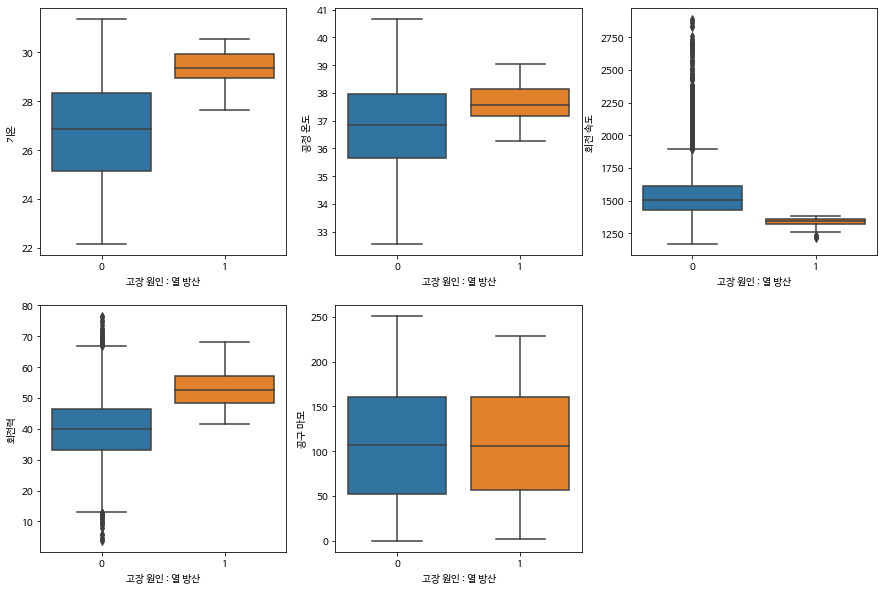

In [37]:
# 각 변수들과 '고장 원인 : 열 방산'과의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 열 방산', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 열 방산', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 열 방산', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 열 방산', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 열 방산', y='공구 마모 시간', data=df, ax=ax5)

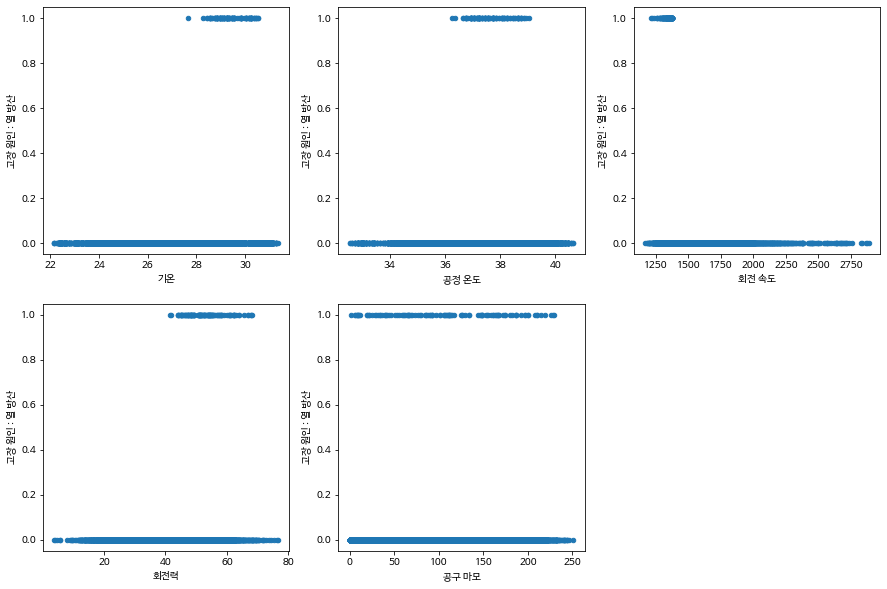

In [38]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 열 방산', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='고장 원인 : 열 방산', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='고장 원인 : 열 방산', kind='scatter', ax=ax3)
df.plot(x='회전력', y='고장 원인 : 열 방산', kind='scatter', ax=ax4)
df.plot(x='공구 마모 시간', y='고장 원인 : 열 방산', kind='scatter', ax=ax5)

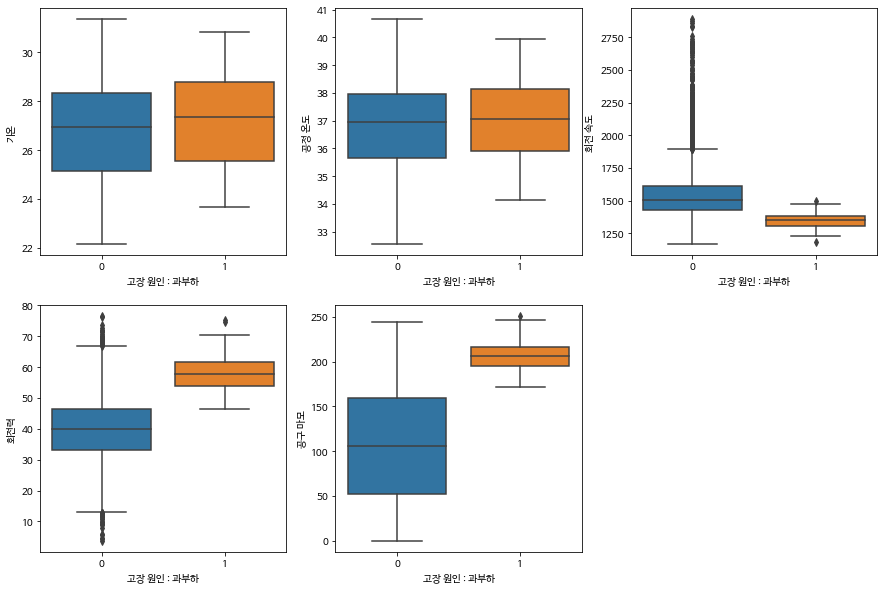

In [39]:
# 각 변수들과 '고장 원인 : 과부하'와의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 과부하', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 과부하', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 과부하', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 과부하', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 과부하', y='공구 마모 시간', data=df, ax=ax5)

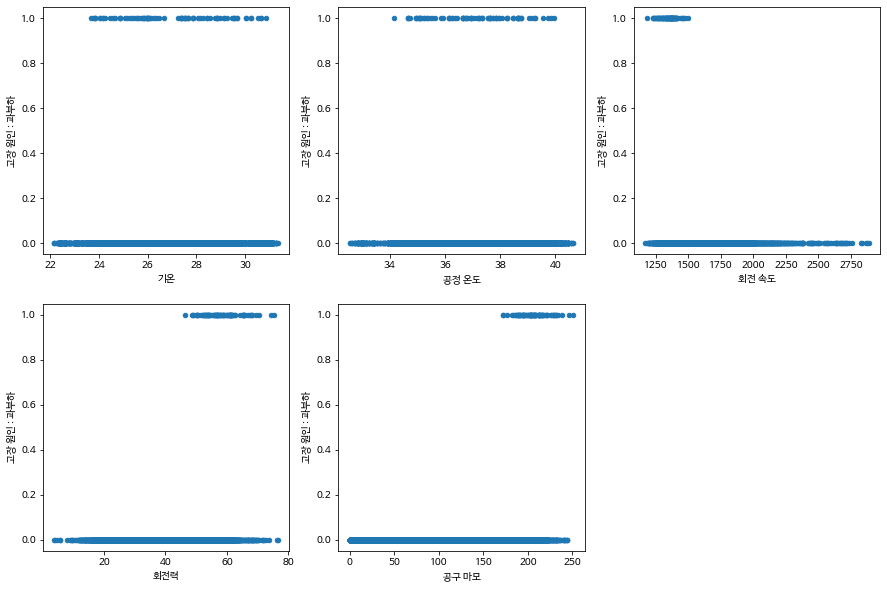

In [40]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 과부하', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='고장 원인 : 과부하', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='고장 원인 : 과부하', kind='scatter', ax=ax3)
df.plot(x='회전력', y='고장 원인 : 과부하', kind='scatter', ax=ax4)
df.plot(x='공구 마모 시간', y='고장 원인 : 과부하', kind='scatter', ax=ax5)

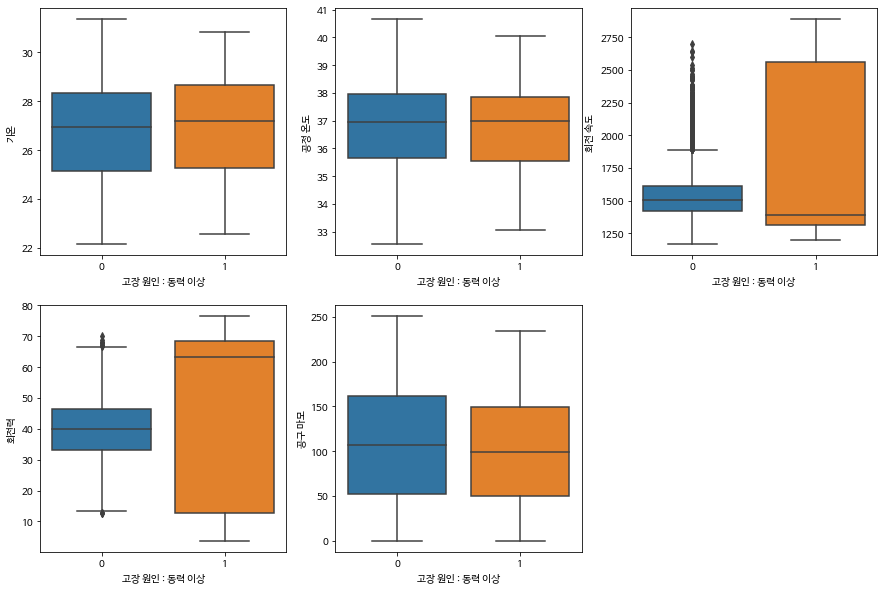

In [41]:
# 각 변수들과 '고장 원인 : 동력 이상'과의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='고장 원인 : 동력 이상', y='기온', data=df, ax=ax1)
sns.boxplot(x='고장 원인 : 동력 이상', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='고장 원인 : 동력 이상', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='고장 원인 : 동력 이상', y='회전력', data=df, ax=ax4)
sns.boxplot(x='고장 원인 : 동력 이상', y='공구 마모 시간', data=df, ax=ax5)

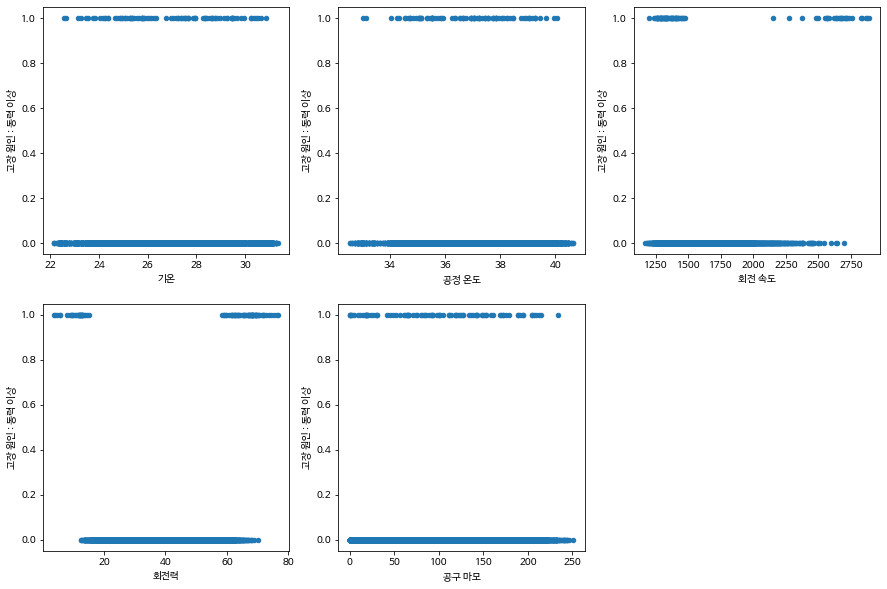

In [42]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='고장 원인 : 동력 이상', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='고장 원인 : 동력 이상', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='고장 원인 : 동력 이상', kind='scatter', ax=ax3)
df.plot(x='회전력', y='고장 원인 : 동력 이상', kind='scatter', ax=ax4)
df.plot(x='공구 마모 시간', y='고장 원인 : 동력 이상', kind='scatter', ax=ax5)

In [43]:
# 결과

# 공구 교체 시기를 제외하니 '고장 원인 : 공구 마모' 요소가 전부 제외되었다.
# 그 외에는 의미있는 변화가 나타나지 않았다.

## 기계 고장이 난 경우 변인들 사이의 관계

In [44]:
df_fail = df[df['고장 여부'] == 1]

In [45]:
df_fail

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 알 수 없음
UDI,,,,,,,,,,,,,
51,L47230,L,25.75,35.95,2861,4.6,143.0,1,0,0,1,0,0
70,L47249,L,25.75,35.85,1410,65.7,191.0,1,0,0,1,1,0
161,L47340,L,25.25,35.05,1282,60.7,216.0,1,0,0,0,1,0
169,L47348,L,25.25,35.15,1433,62.3,20.0,1,0,0,1,0,0
195,M15054,M,25.05,35.35,2678,10.7,86.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9668,L56847,L,26.05,37.15,1352,48.9,238.0,1,0,0,0,1,0
9765,L56944,L,25.35,36.35,1294,66.7,12.0,1,0,0,1,0,0
9823,L57002,L,25.35,36.25,1360,60.9,187.0,1,0,0,0,1,0


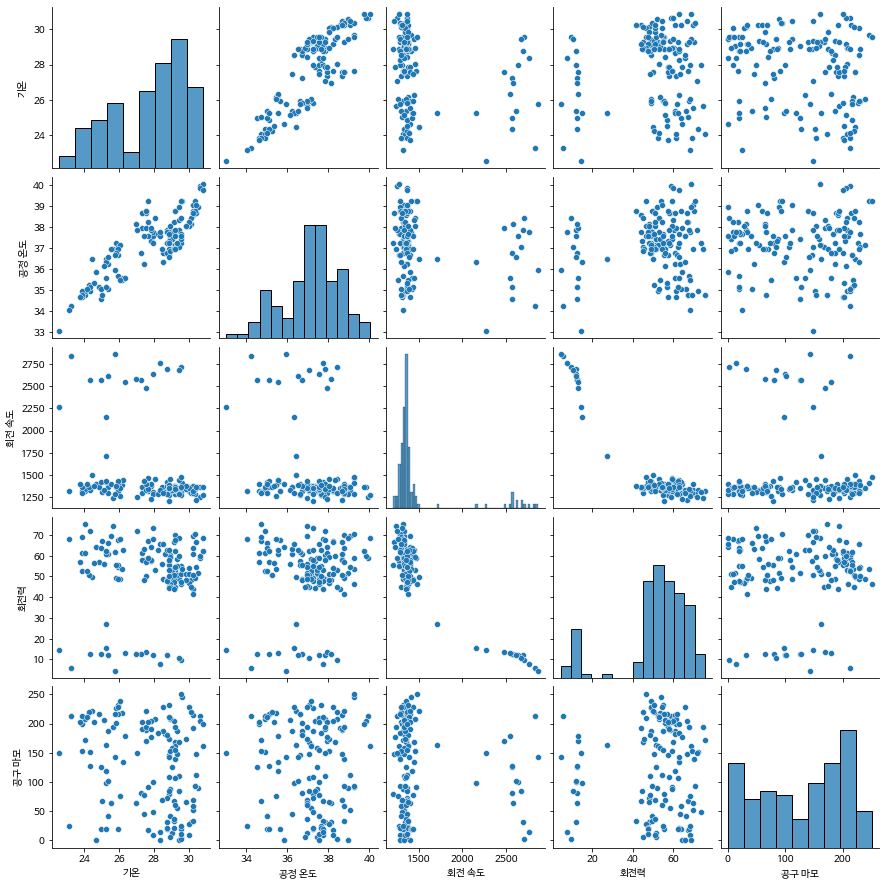

In [46]:
sns.pairplot(df_fail[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']].sample(frac=0.5))

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


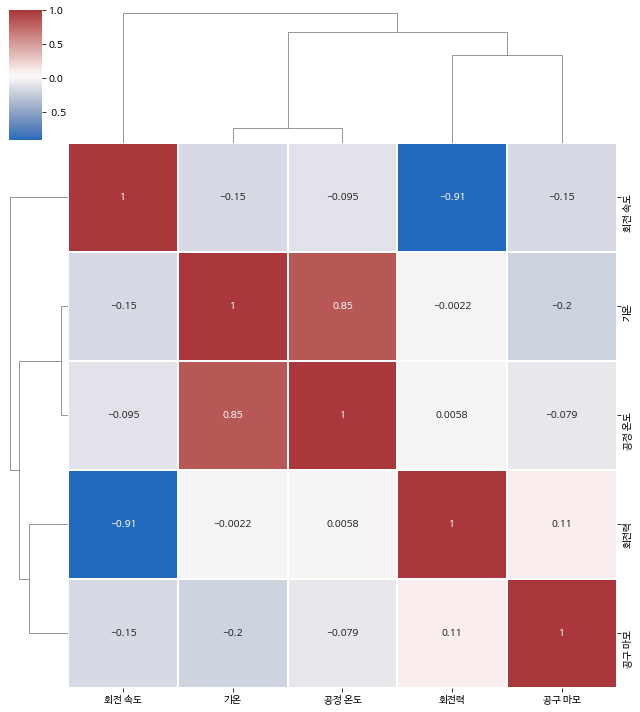

In [47]:
sns.clustermap(df_fail[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']].corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

In [48]:
# 결과

# 고장이 안 난 경우와 상관관계는 비슷하다.

In [49]:
df_L = df[df['제품 유형'] == 'L']
df_M = df[df['제품 유형'] == 'M']
df_H = df[df['제품 유형'] == 'H']

In [50]:
df_L[df['고장 여부'] == 1]

<ipython-input-50-956534e84480>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_L[df['고장 여부'] == 1]


,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 알 수 없음
UDI,,,,,,,,,,,,,
51,L47230,L,25.75,35.95,2861,4.6,143.0,1,0,0,1,0,0
70,L47249,L,25.75,35.85,1410,65.7,191.0,1,0,0,1,1,0
161,L47340,L,25.25,35.05,1282,60.7,216.0,1,0,0,0,1,0
169,L47348,L,25.25,35.15,1433,62.3,20.0,1,0,0,1,0,0
243,L47422,L,24.85,35.05,1348,58.8,202.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9668,L56847,L,26.05,37.15,1352,48.9,238.0,1,0,0,0,1,0
9765,L56944,L,25.35,36.35,1294,66.7,12.0,1,0,0,1,0,0
9823,L57002,L,25.35,36.25,1360,60.9,187.0,1,0,0,0,1,0


In [51]:
df_M[df['고장 여부'] == 1]

<ipython-input-51-7e9a90211d08>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_M[df['고장 여부'] == 1]


,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 알 수 없음
UDI,,,,,,,,,,,,,
195,M15054,M,25.05,35.35,2678,10.7,86.0,1,0,0,1,0,0
208,M15067,M,25.25,35.55,1421,60.7,119.0,1,0,0,1,0,0
260,M15119,M,24.95,35.05,1420,63.9,19.0,1,0,0,1,0,0
881,M15740,M,22.65,33.15,1235,76.2,89.0,1,0,0,1,0,0
1017,M15876,M,23.15,34.05,1319,68.3,24.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,M23105,M,25.85,37.15,1303,68.6,111.0,1,0,0,1,0,0
8308,M23167,M,25.55,36.95,1402,69.7,64.0,1,0,0,1,0,0
8583,M23442,M,24.35,34.95,1334,72.0,151.0,1,0,0,1,0,0


In [52]:
df_H[df['고장 여부'] == 1]

<ipython-input-52-77d7a0289b50>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_H[df['고장 여부'] == 1]


,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 알 수 없음
UDI,,,,,,,,,,,,,
1124,H30537,H,23.45,34.55,1386,62.3,100.0,1,0,0,1,0,0
1438,H30851,H,25.65,36.75,1439,45.2,40.0,1,0,0,0,0,0
3001,H32414,H,27.35,36.65,1324,72.8,159.0,1,0,0,1,0,0
3141,H32554,H,27.25,36.75,2563,12.8,81.0,1,0,0,1,0,0
3830,H33243,H,29.15,37.75,1366,48.4,130.0,1,0,1,0,0,0
4079,H33492,H,28.95,37.55,1294,62.4,101.0,1,0,1,0,0,0
4252,H33665,H,29.35,37.75,1356,55.5,101.0,1,0,1,0,0,0
4356,H33769,H,28.85,36.65,1280,57.3,147.0,1,0,1,0,0,0
4481,H33894,H,29.55,37.25,1305,55.2,20.0,1,0,1,0,0,0


In [53]:
# 고장 원인 없이 기계 고장이 일어난 경우
df_extra = df[(df['고장 여부'] == 1)&(df['고장 원인 : 공구 마모'] == 0)&(df['고장 원인 : 열 방산'] == 0)&(df['고장 원인 : 동력 이상'] == 0)&(df['고장 원인 : 과부하'] == 0)&(df['고장 원인 : 알 수 없음'] == 0)]
df_extra

,제품 ID,제품 유형,기온,공정 온도,회전 속도,회전력,공구 마모,고장 여부,고장 원인 : 공구 마모,고장 원인 : 열 방산,고장 원인 : 동력 이상,고장 원인 : 과부하,고장 원인 : 알 수 없음
UDI,,,,,,,,,,,,,
1438,H30851,H,25.65,36.75,1439,45.2,40.0,1,0,0,0,0,0
2750,M17609,M,26.55,36.05,1685,28.9,179.0,1,0,0,0,0,0
4045,M18904,M,28.75,37.75,1419,47.7,20.0,1,0,0,0,0,0
4685,M19544,M,30.45,38.65,1421,44.8,101.0,1,0,0,0,0,0
5537,M20396,M,29.15,38.65,1363,54.0,119.0,1,0,0,0,0,0
5942,L53121,L,27.45,37.55,1438,48.5,78.0,1,0,0,0,0,0
6479,L53658,L,27.35,36.65,1663,29.1,145.0,1,0,0,0,0,0
8507,L55686,L,25.25,36.45,1710,27.3,163.0,1,0,0,0,0,0
9016,L56195,L,24.05,34.95,1431,49.7,210.0,1,0,0,0,0,0


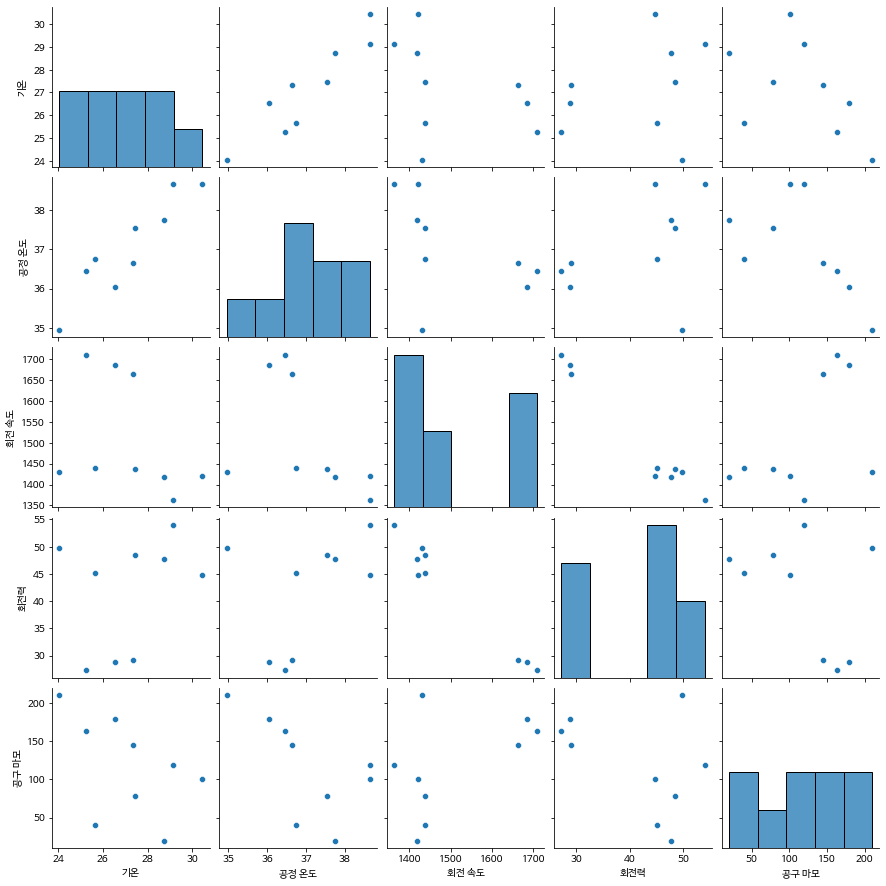

In [54]:
sns.pairplot(df_extra[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']])

# 회귀 분석

In [55]:
# 회귀분석 import
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [56]:
# 종속변수와 독립변수 선택
y = df["고장 여부"]
X = df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']]

In [57]:
X = sm.add_constant(X) # 상수항 추가
model = sm.OLS(y, X).fit() # 최소자승법 적합

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  고장 여부   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     312.4
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          1.88e-311
Time:                        01:36:12   Log-Likelihood:                 4384.7
No. Observations:                9881   AIC:                            -8757.
Df Residuals:                    9875   BIC:                            -8714.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1203      0.062    -18.149      0.0

In [ ]:
# 해석
# t값과 P값을 기준으로 해석할 때
# 5가지 변수 전부 실패 여부와 어떤 관련이 있는 것으로 볼 수 있다.
# 그러므로, 어떤 실패 요인과 관련이 있는지 해석해보려고 한다.

## 각 고장 원인과의 회귀 분석

In [59]:
# 고장 원인 : 열 방산과의 회귀분석
y = df["고장 원인 : 열 방산"]
X = df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           고장 원인 : 열 방산   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     121.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          1.23e-124
Time:                        01:46:39   Log-Likelihood:                 8375.8
No. Observations:                9881   AIC:                        -1.674e+04
Df Residuals:                    9875   BIC:                        -1.670e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1235      0.041      2.997      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# 해석
# t값과 P값을 기준으로 미루어 볼 때
# 고장 원인 : 열 방산과는
# 기온은 양의, 공정 온도는 음의, 회전력과는 양의 상관관계를 갖는다고 해석할 수 있다.

In [62]:
# 고장 원인 : 과부하와의 회귀분석
y = df["고장 원인 : 과부하"]
X = df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            고장 원인 : 과부하   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     137.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          1.64e-141
Time:                        01:47:34   Log-Likelihood:                 9736.6
No. Observations:                9881   AIC:                        -1.946e+04
Df Residuals:                    9875   BIC:                        -1.942e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3663      0.036    -10.199      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# 해석
# t값과 P값을 기준으로 미루어 볼 때
# 고장 원인 : 과부하는
# 회전속도와 회전력, 공구 마모 전부 다 양의 상관관계를 갖는다고 해석할 수 있다.

In [60]:
# 고장 원인 : 동력 이상과의 회귀분석
y = df["고장 원인 : 동력 이상"]
X = df[['기온', '공정 온도', '회전 속도', '회전력', '공구 마모 시간']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          고장 원인 : 동력 이상   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     413.2
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:47:04   Log-Likelihood:                 9963.6
No. Observations:                9881   AIC:                        -1.992e+04
Df Residuals:                    9875   BIC:                        -1.987e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9807      0.035    -27.940      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# 해석
# t값과 P값을 기준으로 미루어 볼 때
# 고장 원인 : 동력 이상과는
# 회전속도와 회전력 둘 다 양의 상관관계를 갖는다고 해석할 수 있다.